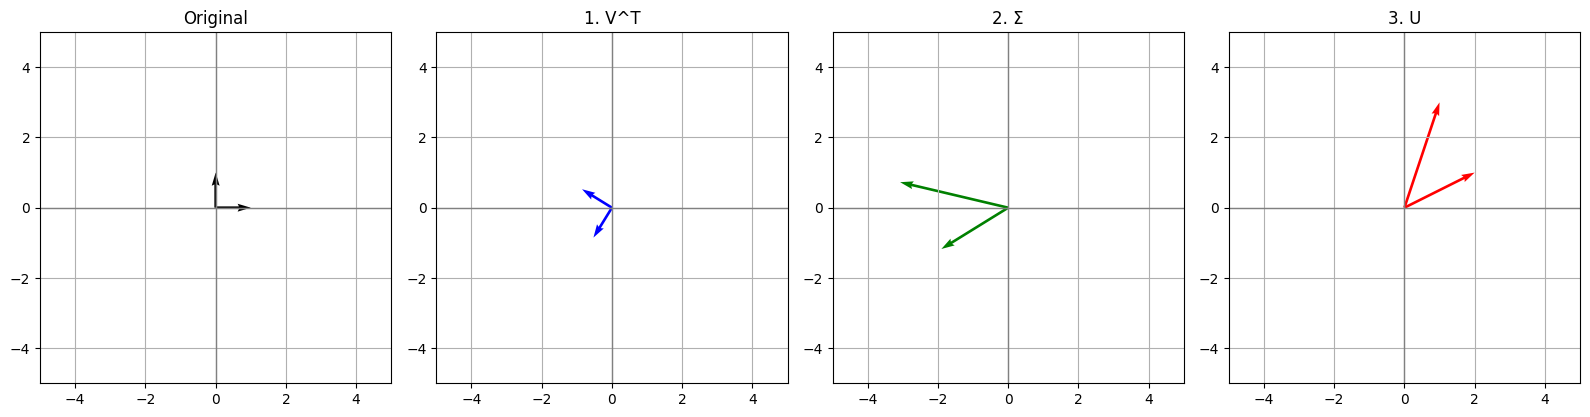

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 임의의 2x2 행렬 정의
A = np.array([[2, 1],
              [1, 3]])

# SVD 수행
U, S, VT = np.linalg.svd(A)

# Sigma 행렬 만들기 (2x2)
Sigma = np.diag(S)

# 단위 벡터 2개
basis = np.eye(2)

# 각 단계에서 벡터 변환
v_step = VT @ basis          # V^T 적용
s_step = Sigma @ v_step      # Sigma 적용
u_step = U @ s_step          # U 적용 (최종 결과 = A @ basis)

# 단계별 벡터 저장
steps = [basis, v_step, s_step, u_step]
labels = ["Original", "1. V^T", "2. Σ", "3. U"]
colors = ["black", "blue", "green", "red"]

# 플롯을 여러 개로 나눠 한눈에 보기
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for i, ax in enumerate(axes):
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.axhline(0, color='gray', lw=1)
    ax.axvline(0, color='gray', lw=1)
    ax.grid(True)
    ax.set_aspect('equal')
    vecs = steps[i]
    for j in range(vecs.shape[1]):
        ax.quiver(0, 0, vecs[0, j], vecs[1, j], angles='xy', scale_units='xy', scale=1, color=colors[i])
    ax.set_title(labels[i])

plt.tight_layout()
plt.show()


### 특이값 분해 활용

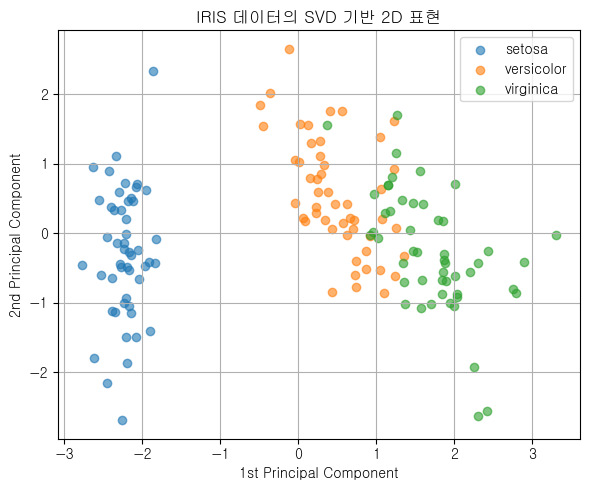

In [16]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = 'C:\\Windows\\Fonts\\NGULIM.TTF'
font = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font)

# 1. IRIS 데이터 불러오기
iris = load_iris()
X = iris.data  # 150 x 4 matrix
y = iris.target

# 2. 표준화
X_std = StandardScaler().fit_transform(X)

# 3 ~ 4 과정은 PCA와 같다!
# 3. SVD 수행
U, S, VT = np.linalg.svd(X_std, full_matrices=False)

# 4. 주성분 2개만 사용해서 차원 축소
X_reduced = U[:, :2] @ np.diag(S[:2])  # 150 x 2

# 5. 시각화
plt.figure(figsize=(6, 5))
for label in np.unique(y):
    plt.scatter(X_reduced[y == label, 0], X_reduced[y == label, 1], label=iris.target_names[label], alpha=0.6)
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.title("IRIS 데이터의 SVD 기반 2D 표현")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

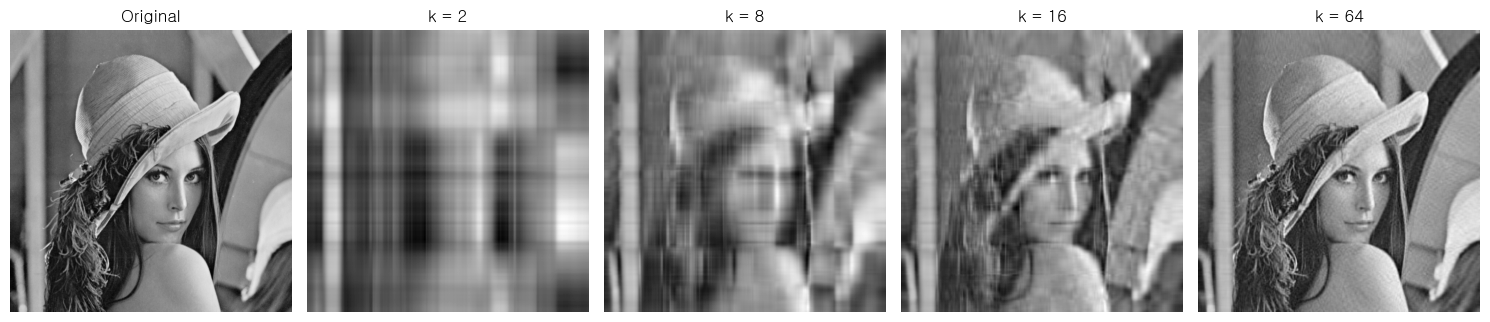

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

original_image = Image.open("Lenna.png").convert("L")

# 2. SVD 수행
U, S, VT = np.linalg.svd(original_image, full_matrices=False)

# 3. k개의 특이값만 사용해 압축 이미지 복원 함수
def svd_compress(U, S, VT, k):
    S_k = np.diag(S[:k])
    U_k = U[:, :k]
    VT_k = VT[:k, :]
    return U_k @ S_k @ VT_k

# 4. 다양한 k에 대해 복원된 이미지 시각화 (최대 512)
ks = [2, 8, 16, 64]
fig, axes = plt.subplots(1, len(ks) + 1, figsize=(15, 4))

# 원본 이미지 표시
axes[0].imshow(original_image, cmap='gray')
axes[0].set_title("Original")
axes[0].axis('off')

# 압축된 이미지들 표시
for i, k in enumerate(ks):
    compressed = svd_compress(U, S, VT, k)
    axes[i+1].imshow(compressed, cmap='gray')
    axes[i+1].set_title(f"k = {k}")
    axes[i+1].axis('off')

plt.tight_layout()
plt.show()